In [1]:
# !pip install wget
import wget
import zipfile
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mutual_info_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from onehot_encoder import onehot_encoding

In [2]:
# !wget https://archive.ics.uci.edu/static/public/222/bank+marketing.zip

Data acquisition

In [3]:
# file = wget.download('https://archive.ics.uci.edu/static/public/222/bank+marketing.zip')

In [4]:
# with zipfile.ZipFile("C:/Users/USER\PycharmProjects\mlzoomcamp-certification\data/bank+marketing.zip", 'r') as zip_ref:
#     zip_ref.extractall()

In [5]:
os.getcwd()

'C:\\Users\\USER\\PycharmProjects\\mlzoomcamp-certification'

In [6]:
# with zipfile.ZipFile("./data/bank.zip", 'r') as zip_ref:
#     zip_ref.extract('bank.csv', "./data/") 

In [7]:
df = pd.read_csv("./data/bank.csv", sep = ";")
df.sample(6)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
478,35,services,married,secondary,no,1453,yes,no,unknown,28,may,199,1,-1,0,unknown,no
1767,51,management,single,tertiary,no,297,yes,no,cellular,15,may,415,4,375,1,failure,yes
3740,36,blue-collar,divorced,primary,no,-308,yes,no,cellular,12,may,725,1,-1,0,unknown,yes
4099,33,management,single,tertiary,no,71,no,no,cellular,22,aug,107,6,-1,0,unknown,no
2655,42,technician,married,secondary,no,4945,yes,no,cellular,2,mar,311,2,-1,0,unknown,yes
251,32,management,married,tertiary,no,2349,no,no,cellular,14,aug,134,5,-1,0,unknown,no


In [8]:
df = df.drop(columns = 'default')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   balance    4521 non-null   int64 
 5   housing    4521 non-null   object
 6   loan       4521 non-null   object
 7   contact    4521 non-null   object
 8   day        4521 non-null   int64 
 9   month      4521 non-null   object
 10  duration   4521 non-null   int64 
 11  campaign   4521 non-null   int64 
 12  pdays      4521 non-null   int64 
 13  previous   4521 non-null   int64 
 14  poutcome   4521 non-null   object
 15  y          4521 non-null   object
dtypes: int64(7), object(9)
memory usage: 565.3+ KB


In this dataset our desired target for classification task will be y variable - has the client subscribed a term deposit or not.

What is the most frequent observation (mode) for the column education?

In [10]:
df.education.value_counts()

education
secondary    2306
tertiary     1350
primary       678
unknown       187
Name: count, dtype: int64

What are the two features that have the biggest correlation?

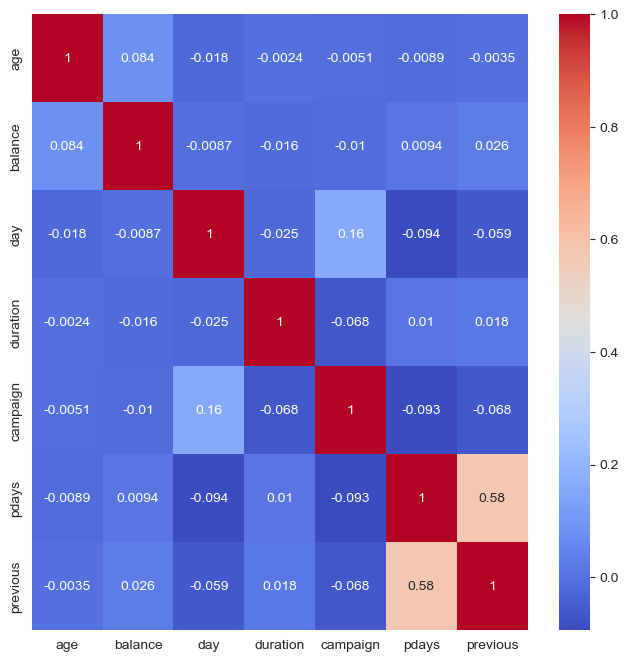

In [11]:
numerical_df = df.select_dtypes(include=['int64', 'float64'])  # Select only numerical columns
corr_matrix = numerical_df.corr()

plt.figure(figsize=(8, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')  # heatmap
plt.show()  # plot

Mutual information score

In [12]:
# Split the data into train/val/test sets with 60%/20%/20% distribution
X = df.drop('y', axis=1)  # features
y = df['y']  # target variable
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

In [13]:
# train/val/test sets with 60%/20%/20% distribution
X.shape, X_train.shape, X_val.shape, X_test.shape

((4521, 15), (2712, 15), (904, 15), (905, 15))

In [14]:
# mutual information score between y and each categorical variable in the training set
categorical_cols = X_train.select_dtypes(include=['object']).columns
mutual_info_scores = {}
for col in categorical_cols:
    score  = mutual_info_score(y_train, X_train[col])
    mutual_info_scores[col] = round(score, 2)

In [15]:
# mutual information scores
print(mutual_info_scores)

{'job': 0.01, 'marital': 0.0, 'education': 0.0, 'housing': 0.01, 'loan': 0.0, 'contact': 0.01, 'month': 0.02, 'poutcome': 0.03}


Sort the mutual info score.

In [16]:
sorted_mutual_info_scores = dict(sorted(mutual_info_scores.items(), key=lambda item: item[1], reverse=True))

print(sorted_mutual_info_scores)

{'poutcome': 0.03, 'month': 0.02, 'job': 0.01, 'housing': 0.01, 'contact': 0.01, 'marital': 0.0, 'education': 0.0, 'loan': 0.0}


Linear regression

In [17]:
categorical_cols = X.select_dtypes(include=['object']).columns
categorical_cols

Index(['job', 'marital', 'education', 'housing', 'loan', 'contact', 'month',
       'poutcome'],
      dtype='object')

In [18]:
data = X.copy() # make a copy of the original dataframe (df)

column_to_dummy = categorical_cols # columns to one-hot encode

data = onehot_encoding(column_to_dummy, data) # perform operation

data.head()

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,30,1787,19,79,1,-1,0,False,False,False,...,False,False,False,False,True,False,False,False,False,True
1,33,4789,11,220,1,339,4,False,False,False,...,False,False,True,False,False,False,True,False,False,False
2,35,1350,16,185,1,330,1,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3,30,1476,3,199,4,-1,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
4,59,0,5,226,1,-1,0,False,True,False,...,False,False,True,False,False,False,False,False,False,True


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 49 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  4521 non-null   int64
 1   balance              4521 non-null   int64
 2   day                  4521 non-null   int64
 3   duration             4521 non-null   int64
 4   campaign             4521 non-null   int64
 5   pdays                4521 non-null   int64
 6   previous             4521 non-null   int64
 7   job_admin.           4521 non-null   bool 
 8   job_blue-collar      4521 non-null   bool 
 9   job_entrepreneur     4521 non-null   bool 
 10  job_housemaid        4521 non-null   bool 
 11  job_management       4521 non-null   bool 
 12  job_retired          4521 non-null   bool 
 13  job_self-employed    4521 non-null   bool 
 14  job_services         4521 non-null   bool 
 15  job_student          4521 non-null   bool 
 16  job_technician       452

In [24]:
# # Split the data into training and validation sets (80% train, 20% validation)
# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_val, X_test, y_train_val, y_test = train_test_split(data, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

# Train the Logistic Regression model
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Predict on the validation dataset
y_pred = model.predict(X_val)

# Calculate accuracy
accuracy = accuracy_score(y_val, y_pred)

# Print rounded accuracy to 2 decimal places
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.89


Least useful feature

In [26]:
# Step 1: Train the original model with all features
model.fit(X_train, y_train)
original_accuracy = accuracy_score(y_val, model.predict(X_val))
print(f"Original Accuracy: {original_accuracy:.2f}")

# Step 2: Perform feature elimination and track accuracies
feature_accuracies = {}

for i, feature in enumerate(data.columns):
    # Create a copy of the data excluding the current feature
    X_train_temp = X_train.drop(columns=[feature])
    X_val_temp = X_val.drop(columns=[feature])
    
    # Train the model without the current feature
    model.fit(X_train_temp, y_train)
    
    # Calculate accuracy without the feature
    accuracy_without_feature = accuracy_score(y_val, model.predict(X_val_temp))
    
    # Record the accuracy and the difference from the original
    feature_accuracies[feature] = original_accuracy - accuracy_without_feature
    print(f"Accuracy without {feature}: {accuracy_without_feature:.2f} (Difference: {original_accuracy - accuracy_without_feature:.2f})")

# Step 3: Find the feature with the smallest difference
least_useful_feature = min(feature_accuracies, key=feature_accuracies.get)
print(f"Least useful feature: {least_useful_feature}")

Original Accuracy: 0.89
Accuracy without age: 0.89 (Difference: 0.00)
Accuracy without balance: 0.89 (Difference: 0.00)
Accuracy without day: 0.89 (Difference: -0.00)
Accuracy without duration: 0.87 (Difference: 0.02)
Accuracy without campaign: 0.89 (Difference: 0.00)
Accuracy without pdays: 0.89 (Difference: 0.00)
Accuracy without previous: 0.89 (Difference: 0.00)
Accuracy without job_admin.: 0.89 (Difference: 0.00)
Accuracy without job_blue-collar: 0.89 (Difference: 0.00)
Accuracy without job_entrepreneur: 0.89 (Difference: 0.00)
Accuracy without job_housemaid: 0.89 (Difference: 0.00)
Accuracy without job_management: 0.89 (Difference: 0.00)
Accuracy without job_retired: 0.89 (Difference: -0.00)
Accuracy without job_self-employed: 0.89 (Difference: 0.00)
Accuracy without job_services: 0.89 (Difference: 0.00)
Accuracy without job_student: 0.89 (Difference: 0.00)
Accuracy without job_technician: 0.89 (Difference: -0.00)
Accuracy without job_unemployed: 0.89 (Difference: 0.00)
Accuracy w

In [27]:
# List of C values to try
C_values = [0.01, 0.1, 1, 10, 100]

# Dictionary to store the accuracy for each C value
C_accuracies = {}

for C in C_values:
    # Train the logistic regression model with the current value of C
    model = LogisticRegression(solver='liblinear', C=C, max_iter=1000, random_state=42)
    model.fit(X_train, y_train)
    
    # Predict on the validation dataset
    y_pred = model.predict(X_val)
    
    # Calculate accuracy and round to 3 decimal digits
    accuracy = accuracy_score(y_val, y_pred)
    C_accuracies[C] = round(accuracy, 3)
    print(f"Accuracy with C={C}: {C_accuracies[C]}")

# Display accuracies for all C values
print("\nAccuracies for different values of C:")
for C, accuracy in C_accuracies.items():
    print(f"C={C}: Accuracy = {accuracy}")

Accuracy with C=0.01: 0.877
Accuracy with C=0.1: 0.884
Accuracy with C=1: 0.892
Accuracy with C=10: 0.89
Accuracy with C=100: 0.893

Accuracies for different values of C:
C=0.01: Accuracy = 0.877
C=0.1: Accuracy = 0.884
C=1: Accuracy = 0.892
C=10: Accuracy = 0.89
C=100: Accuracy = 0.893
